In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [47]:
data = pd.read_excel('inputpearson_fitur_all.xlsx')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HR        268 non-null    float64
 1   SDNN      268 non-null    float64
 2   RMSSD     268 non-null    float64
 3   SDSD      268 non-null    float64
 4   pNN50     268 non-null    float64
 5   LF        268 non-null    float64
 6   HF        268 non-null    float64
 7   LF/HF     268 non-null    float64
 8   SD1       268 non-null    float64
 9   SD2       268 non-null    float64
 10  SD_ratio  268 non-null    float64
 11  Label     268 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 25.3 KB


In [49]:
data_copy = data.replace(to_replace=['0','1'],value=[0,1],inplace=False)

In [50]:
corr_df = data.corr()
corr_df

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
HR,1.000000,-0.069292,-0.008693,0.002088,-0.037746,0.391869,0.348852,-0.044595,-0.008690,-0.087954,-0.087746,-0.061009
SDNN,-0.069292,1.000000,0.830685,0.813850,0.438372,0.040594,-0.250288,0.046034,0.830665,0.979686,0.009304,0.112814
RMSSD,-0.008693,0.830685,1.000000,0.991344,0.432337,0.169294,-0.215230,-0.190216,1.000000,0.706029,-0.425946,-0.075613
SDSD,0.002088,0.813850,0.991344,1.000000,0.324259,0.146304,-0.210804,-0.158819,0.991348,0.686370,-0.404095,-0.044855
pNN50,-0.037746,0.438372,0.432337,0.324259,1.000000,0.214096,-0.113878,-0.345339,0.432326,0.422461,-0.408734,-0.227341
LF,0.391869,0.040594,0.169294,0.146304,0.214096,1.000000,0.119933,-0.243363,0.169289,-0.005986,-0.255936,-0.359874
HF,0.348852,-0.250288,-0.215230,-0.210804,-0.113878,0.119933,1.000000,-0.051641,-0.215226,-0.242263,-0.058732,-0.005916
LF/HF,-0.044595,0.046034,-0.190216,-0.158819,-0.345339,-0.243363,-0.051641,1.000000,-0.190233,0.104568,0.672907,0.379670
SD1,-0.008690,0.830665,1.000000,0.991348,0.432326,0.169289,-0.215226,-0.190233,1.000000,0.706006,-0.425979,-0.075616
SD2,-0.087954,0.979686,0.706029,0.686370,0.422461,-0.005986,-0.242263,0.104568,0.706006,1.000000,0.136779,0.164383


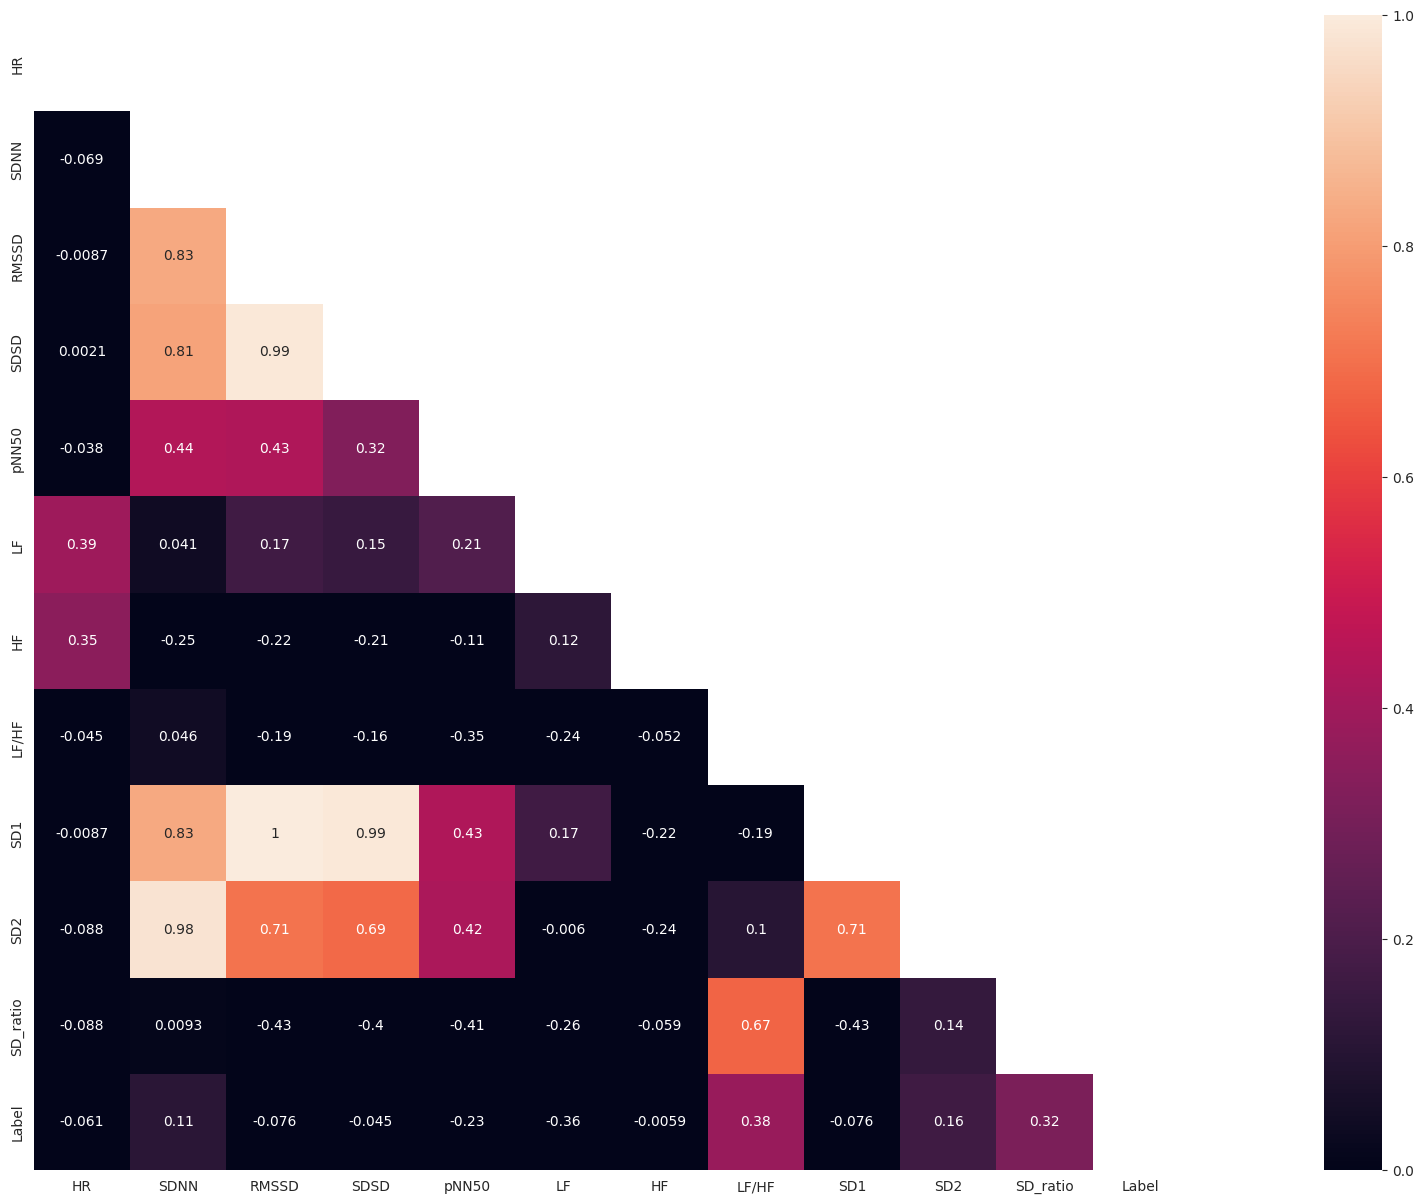

In [51]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(35,15))
    sns.heatmap(data=corr_df,vmin=0,vmax=1,mask=mask,square=True,annot=True)

In [52]:
strong_relation_features = pd.Series(corr_df['Label']).nlargest(n=8).iloc[1:] #iloc menghapus label 
strong_relation_features

LF/HF       0.379670
SD_ratio    0.316395
SD2         0.164383
SDNN        0.112814
HF         -0.005916
SDSD       -0.044855
HR         -0.061009
Name: Label, dtype: float64

In [54]:
data_copy = pd.concat([data[list(strong_relation_features.index)], data["Label"]], axis=1)
data_copy

,LF/HF,SD_ratio,SD2,SDNN,HF,SDSD,HR,Label
0,5.539092,4.770022,117.278655,84.736737,0.217773,19.973247,61.126662,1
1,3.672042,4.326800,122.622780,89.127107,0.220703,23.955765,60.123075,1
2,5.837829,4.821993,131.446613,95.062589,0.198242,29.226415,66.351543,1
3,4.973868,3.566797,84.865824,62.335594,0.178711,21.731285,60.307120,1
4,1.215300,3.402178,83.657657,61.699760,0.259766,22.433829,61.598715,1
...,...,...,...,...,...,...,...,...
263,0.400605,1.509284,37.660663,31.948824,0.212891,18.874776,57.288017,0
264,2.015527,4.196804,132.677041,96.505428,0.187500,29.187948,59.035115,0
265,0.324326,1.796033,43.764672,35.457272,0.212891,19.077757,57.279576,0
266,0.611619,1.738079,40.841780,33.330253,0.216797,18.896535,57.436061,0
